# Optimization and Machine Learning Model

*(Credit: exposition auto-generated by llama3-70b)*

In this notebook, we will explore the concept of optimization algorithms in machine learning, specifically focusing on gradient descent. We will use linear regression as an example to illustrate the process.

## Generating Sample Data
To begin, we need to generate some sample data. We define the true parameters `m_true` and `c_true` for our linear regression model, as well as the `x_samples` array. We then define a function `generate_y_samples` to generate the corresponding `y_samples` with some added noise.

In [1]:
import numpy as np
import numpy.random

m_true = 1.3
c_true = -0.4
x_samples = np.array([-3, -2.5, -1, 1, 4, 4.5, 5.2, 7.4, 7.8, 9])

sigma = 1.5

def generate_y_samples(m, c, sigma, x_samples):
    y_target = m * x_samples + c
    noise = sigma * np.random.randn(x_samples.shape[0])
    return y_target + noise


In [2]:
y_samples = generate_y_samples(m_true, c_true, sigma, x_samples)
print(y_samples)

[-5.21069667 -2.97129019  0.61527482  0.70749612  2.35722085  3.83333572
  5.85442465  7.64433882 12.59946253 10.35204268]


## Visualizing the Data

After generating the `y_samples` using the `generate_y_samples` function, we visualize the data using a scatter plot, along with the ground truth line.

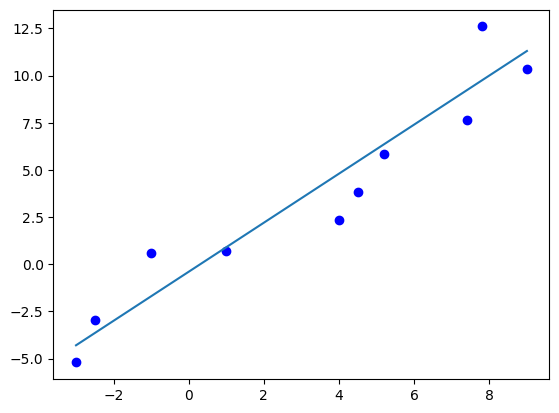

In [3]:
import matplotlib.pyplot as plt

x_range = (np.min(x_samples), np.max(x_samples))

def plot_straight_line(m, c, x_range, color):
    linear_range = np.linspace(x_range[0], x_range[1])
    the_line = m * linear_range + c
    plt.plot(linear_range, the_line, linestyle='solid')

plt.plot(x_samples, y_samples, 'bo')
plot_straight_line(m_true, c_true, x_range, 'blue') # Ground truth
plt.show()

## Computing the Gradient

Next, we use SymPy to derive the gradient of the mean squared error (MSE) expression with respect to the parameters `m` and `c`. This will be useful later in our optimization algorithm.

In [4]:
import sympy as sym

m, c = sym.symbols('m c')

def mse_expr(m, c):
    expr = 0
    for x, y in zip(x_samples, y_samples):
        term = m * x + c - y
        expr += (term * term)
    return expr

sym.diff(mse_expr(m, c), m)

64.8*c + 554.28*m - 656.573476524468

Furthermore, we define a function `get_numeric_gradient` to compute the numeric gradient of the MSE expression at a given point `(m_eval, c_eval)`. We test this function with some sample values.

In [5]:
def get_numeric_gradient(m_eval, c_eval):
    sub = {m: m_eval, c: c_eval}
    partial_m = sym.diff(mse_expr(m, c), m).evalf(subs=sub)
    partial_c = sym.diff(mse_expr(m, c), c).evalf(subs=sub)
    return np.array([partial_m, partial_c]).astype(np.float64)

get_numeric_gradient(1.2, -0.3)

array([-10.87747652,   0.19678134])

In [6]:
get_numeric_gradient(m_true, c_true)

array([38.07052348,  4.67678134])

In [7]:
mse_expr(m, c).evalf(subs={m:1.2, c:-0.3})

25.9658335154570

## Defining the Optimization Problem

We now give an optimization formulation of this toy Machine Learning model: given a set of training data, we will use it to fit model parameter by trying to find a parameter value that will minimize an empirical, mean squared error loss. This is shown in the method `get_numeric_loss` below.

For testing purpose, we initialize our parameter to be near the ground truth value with some noise (`param_init`), because we want to illustrate the training dynamics/optimization trajectory later on.

In [8]:
scale = 5
param_init = (2 * np.random.rand(2) - 1) * scale + np.array([m_true, c_true])
param_init

array([ 0.39774963, -3.77155667])

## Gradient Descent Algorithm

Here, we define the gradient descent algorithm, which takes in the initial parameters, a learning rate `lambda_hyper`, and the number of iterations `iter_n`. The algorithm iteratively updates the parameters using the gradient of the MSE expression.

In [9]:
def get_numeric_loss(param):
    return float(mse_expr(m, c).evalf(subs={m:param[0], c:param[1]}))

def gradient_descent(param_init, lambda_hyper, iter_n):
    param_cur = np.copy(param_init)
    tt = np.copy(param_cur)
    param_history = [tt]
    loss_history = [get_numeric_loss(tt)]
    for _ in range(iter_n):
        param_cur -= lambda_hyper * get_numeric_gradient(param_cur[0], param_cur[1])
        tmp = np.copy(param_cur)
        param_history.append(tmp)
        loss_history.append(get_numeric_loss(tmp))
    return (param_history, loss_history)

## Running the Gradient Descent Algorithm

Finally, let's run the gradient descent algorithm with the specified parameters! In the next few cells, we inspect the initial parameters, the first few iterations of the parameter history, and the corresponding loss history.

In [10]:
param_history, loss_history = gradient_descent(param_init, 0.002, 100)

In [11]:
param_init

array([ 0.39774963, -3.77155667])

In [12]:
param_init[0]

0.39774963314484046

In [13]:
loss_history[:10]

[513.3668158924338,
 93.13244726316324,
 83.76755909418115,
 80.86597288570181,
 78.19734654998712,
 75.65933646393782,
 73.24421782339603,
 70.94601966962735,
 68.75908134390545,
 66.67801655676773]

In [14]:
param_history[:10]

[array([ 0.39774963, -3.77155667]),
 array([ 1.758761  , -3.52911632]),
 array([ 1.57958933, -3.47276065]),
 array([ 1.59173652, -3.39543857]),
 array([ 1.58039688, -3.32278364]),
 array([ 1.57221183, -3.25156529]),
 array([ 1.5638705, -3.1821349]),
 array([ 1.55577785, -3.11440068]),
 array([ 1.54787804, -3.04832702]),
 array([ 1.5401725, -2.9838725])]

In [15]:
np.array(param_history[:10])[:,0]

array([0.39774963, 1.758761  , 1.57958933, 1.59173652, 1.58039688,
       1.57221183, 1.5638705 , 1.55577785, 1.54787804, 1.5401725 ])

In [ ]:
def mse_np(m, c):
    pass

## Visualizing the Optimization Trajectory

To visualize the optimization trajectory, we first create a meshgrid of possible values for `m` and `c`. Next, we evaluate the MSE expression at each point on the meshgrid. Finally, we visualize the optimization trajectory using a contour plot, along with the path taken by the gradient descent algorithm.

In [16]:
o_a, o_b = np.meshgrid(np.linspace(m_true - scale, m_true + scale), np.linspace(c_true - scale,c_true + scale))
print(o_a.shape, o_b.shape)

(50, 50) (50, 50)


In [17]:
f_eval_1 = np.sum(np.square(o_a[..., np.newaxis] * np.expand_dims(x_samples, axis=(0,1)) + o_b[..., np.newaxis] - np.expand_dims(y_samples, axis=(0,1))), axis=-1)

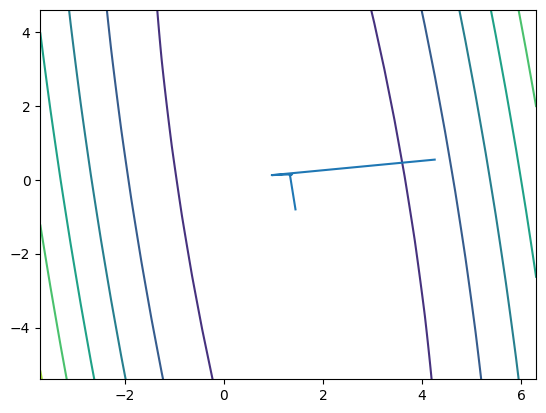

In [88]:
plt.contour(o_a, o_b, f_eval_1) #, cmap='RdGy'

zipped_trajectory = np.array(param_history)

plt.plot(zipped_trajectory[:,0], zipped_trajectory[:,1], linestyle="solid")
plt.show()

# Conclusion

This concludes our exploration of gradient descent in linear regression. We have seen how to derive the gradient symbolically, compute the numeric gradient, and implement the gradient descent algorithm to optimize the parameters.
